# Sample Size Experiment using Random Forest and Deep Networks

In [1]:
from sample_size_functions import *

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

### Random Forest (RF) vs. Deep Networks (DN)

Random forest is inherently a non-parametric model, meaning that the algorithm requires no assumptions about the data distribution. With infinitely many trees and n &rarr; $\infty$, RF will follow non-parametric behavior and will guarantee convergence.

Deep Networks with a fixed architecture are entirely parametric. As presented by [Vogelstein, et al. (2020)](https://www.biorxiv.org/content/10.1101/2020.04.29.068460v1), there is a visible bias variance tradeoff between DNs of varying complexity. This is evident by testing each model over a range of sample sizes. At a large enough sample size, a RF model will surpass any parametric DN.

The goal of this tutorial is to identify a joint distribution (X,Y) that demonstrates this relationship. RF should profuce a smaller generalization error as small sample sizes, a specific parametric DN should produce a smaller generalization error at medium sample sizes, and RF should once again produce a smaller generalization error at large sample sizes.

### Sparse Parity Distribution

The joint distribution used to demonstrate RF convergence is sparse parity. Sparse parity is a _p_-dimensional binary classification problem that generalizes the noisy XOR distribution. 

Data is generated from a _p_-dimensional feature vector, where each _X_<sub>1</sub>, ... , _X_<sub>p</sub> ~ i.i.d.  _U_(-1,1). A parameter _p*_ represents the number of informative dimensions, where _p* < p_. Class label _Y_ = 0 if there are an even number of positive values among the first _p* < p_ dimensions, and _Y_ = 1 if not.

Mathematically, we can let _Q_ = $\sum_{j=1}^{p*}$I ( X<sub>j</sub> > 0 ) where p* < p. The function I ( X<sub>j</sub> > 0 ) represents the indicator that the feature at position _j_ is greater than 0. Class label _Y_ returns 1 if _Q_ is odd, and 0 if _Q_ is even.

In [2]:
X, y = sparse_parity(num_samples=500, p=5, p_star=2)

### Visualize Sparse Parity

Plot the first and second dimensions of the sparse parity distribution. For this plot, _p_ = 5 and _p*_ = 2. With only 2 informative dimensions, this plot is equivalent to the XOR distribution.

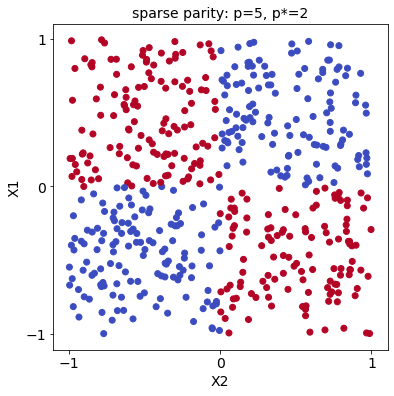

In [3]:
fig = plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')

plt.ylabel('X1', fontsize=14);
plt.xlabel('X2', fontsize=14);
plt.yticks([-1,0,1], fontsize=14);
plt.xticks([-1,0,1], fontsize=14);
plt.title('sparse parity: p=5, p*=2', fontsize=14);

### Select Sample Sizes and Model Parameters

To view the intended relationship, we will select a range of sample sizes to train our model. For the given DN and RF parameters, sample sizes ranging from 500 to 20000 will be sufficient. We also must select the size of the training set. It is suggested that this set be approximately 40% of the maximum training size.

In addition, we set the number of iterations to run the model, and the sparse parity parameters. The ideal sparse parity parameters are _p_ = 14 and _p*_ = 3.

We next set our parameters for RF. RF is modeled as an non parametric model, so we will set the number of trees to 500 and the depth to None.

Lastly, we select our parameters to create the DN. The parametric DN uses a single hidden layer with 4 nodes, mini-batch sampling of size 3, and 10 epochs.

In [4]:
# sample_sizes = [
#     500,
#     1000,
#     2000,
#     3000,
#     5000,
#     7000,
#     10000,
#     12500,
#     15000,
#     20000,
#     24000,
#     28571,
# ]

training_sample_sizes = [
    500,
    1000,
    2000,
    3000,
    5000,
    7000,
    10000,
    12000,
    14000,
    17000,
    20000
]
testing_sample_size = 8000

# scaled_sample_sizes = [int(ss * 0.7) for ss in sample_sizes]
# sample_sizes = [300, 400, 500]
iterations = 100
p = 14
p_star = 3
num_trees = 500
num_jobs = -1
rf_verbose = 0
hidden_nodes = 4
batch_size = 3
dnn_verbose = 0

### Run the Testing Suite

In [5]:
rf_sp14_3_iter100d, dn_sp14_3_hn4_bs3_iter100d = test_suite(
    training_sample_sizes=training_sample_sizes,
    testing_sample_size=testing_sample_size,
    iterations=iterations,
    p=p,
    p_star=p_star,
    num_trees=num_trees,
    n_jobs=num_jobs,
    rf_verbose=rf_verbose,
    hidden_nodes=hidden_nodes,
    batch_size=batch_size,
    dnn_verbose=dnn_verbose,
)

ITERATION:  0
ITERATION:  1
ITERATION:  2
ITERATION:  3
ITERATION:  4
ITERATION:  5
ITERATION:  6
ITERATION:  7
ITERATION:  8
ITERATION:  9
ITERATION:  10
ITERATION:  11
ITERATION:  12
ITERATION:  13
ITERATION:  14
ITERATION:  15
ITERATION:  16
ITERATION:  17
ITERATION:  18
ITERATION:  19
ITERATION:  20
ITERATION:  21
ITERATION:  22
ITERATION:  23
ITERATION:  24
ITERATION:  25
ITERATION:  26
ITERATION:  27
ITERATION:  28
ITERATION:  29
ITERATION:  30
ITERATION:  31
ITERATION:  32
ITERATION:  33
ITERATION:  34
ITERATION:  35
ITERATION:  36
ITERATION:  37
ITERATION:  38
ITERATION:  39
ITERATION:  40
ITERATION:  41
ITERATION:  42
ITERATION:  43
ITERATION:  44
ITERATION:  45
ITERATION:  46
ITERATION:  47
ITERATION:  48
ITERATION:  49
ITERATION:  50
ITERATION:  51
ITERATION:  52
ITERATION:  53
ITERATION:  54
ITERATION:  55
ITERATION:  56
ITERATION:  57
ITERATION:  58
ITERATION:  59
ITERATION:  60
ITERATION:  61
ITERATION:  62
ITERATION:  63
ITERATION:  64
ITERATION:  65
ITERATION:  66
ITERA

### Store Model Outputs

It may be useful to store the model outputs for higher iterations of training.

In [6]:
# %store rf_sp14_3_iter100
# %store dn_sp14_3_hn4_bs3_iter100

# %store rf_sp14_3_iter100b
# %store dn_sp14_3_hn4_bs3_iter100b

# c is best so far
# %store rf_sp14_3_iter100c
# %store dn_sp14_3_hn4_bs3_iter100c

%store rf_sp14_3_iter100d
%store dn_sp14_3_hn4_bs3_iter100d

Stored 'rf_sp14_3_iter100d' (ndarray)
Stored 'dn_sp14_3_hn4_bs3_iter100d' (ndarray)


### Plot and Visualize the Results

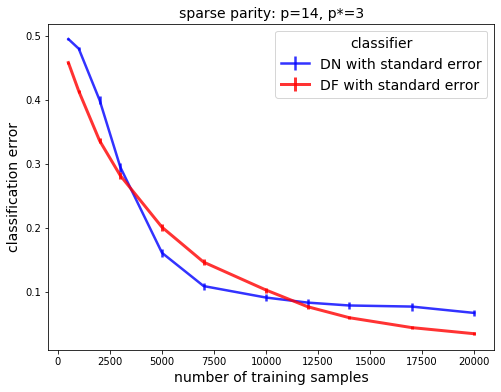

In [7]:
dn_sp14_3_hn4_bs3_iter100_mean = np.mean(dn_sp14_3_hn4_bs3_iter100d, axis=1)
rf_sp14_3_iter100_mean = np.mean(rf_sp14_3_iter100d, axis=1)

yerr_dn = stats.sem(dn_sp14_3_hn4_bs3_iter100d, axis=1)
yerr_rf = stats.sem(rf_sp14_3_iter100d, axis=1)

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
# ax.plot(sample_sizes, dnn_e_4hn_3bs_mean, linewidth=1.5, c="maroon")
# ax.plot(sample_sizes, rf_e_mean, linewidth=2.5, c="black", linestyle="dashed")
ax.errorbar(
    training_sample_sizes,
    dn_sp14_3_hn4_bs3_iter100_mean,
    yerr=yerr_dn,
    linewidth=2.5,
    c="b",
    alpha=0.8,
)
ax.errorbar(
    training_sample_sizes,
    rf_sp14_3_iter100_mean,
    yerr=yerr_rf,
    linewidth=3,
    c="r",
    alpha=0.8,
)

plt.title("sparse parity: p=14, p*=3", fontsize=14)
plt.xlabel("number of training samples", fontsize=14)
plt.ylabel("classification error", fontsize=14)
legend = ax.legend(
    ["DN with standard error", "DF with standard error"],
    title="classifier",
    prop={"size": 14},
)
plt.setp(legend.get_title(), fontsize=14)

fig.savefig(
    "Final Figures/dnn_4hn_3bs_10iters_rf_overlay_FINAL_20000_wTestFunctions_Take4.png"
)

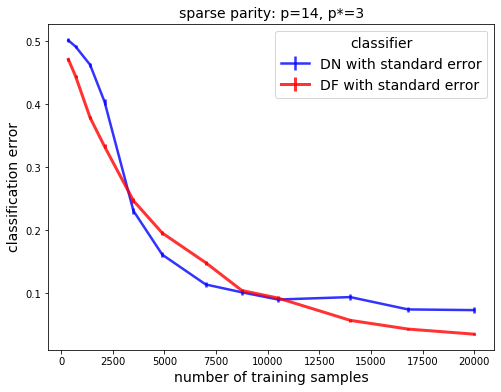

<IPython.core.display.Javascript object>

In [13]:
%store -r rf_sp14_3_iter100
%store -r dn_sp14_3_hn4_bs3_iter100

rf_comb = np.concatenate((rf_sp14_3_iter100, rf_sp14_3_iter100b), axis=1)
dn_comb = np.concatenate(
    (dn_sp14_3_hn4_bs3_iter100, dn_sp14_3_hn4_bs3_iter100b), axis=1
)

dn_comb_mean = np.mean(dn_comb, axis=1)
rf_comb_mean = np.mean(rf_comb, axis=1)

yerr_dn = stats.sem(dn_comb, axis=1)
yerr_rf = stats.sem(rf_comb, axis=1)

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
# ax.plot(sample_sizes, dnn_e_4hn_3bs_mean, linewidth=1.5, c="maroon")
# ax.plot(sample_sizes, rf_e_mean, linewidth=2.5, c="black", linestyle="dashed")
ax.errorbar(
    scaled_sample_sizes,
    dn_comb_mean,
    yerr=yerr_dn,
    linewidth=2.5,
    c="b",
    alpha=0.8,
)
ax.errorbar(
    scaled_sample_sizes,
    rf_comb_mean,
    yerr=yerr_rf,
    linewidth=3,
    c="r",
    alpha=0.8,
)

plt.title("sparse parity: p=14, p*=3", fontsize=14)
plt.xlabel("number of training samples", fontsize=14)
plt.ylabel("classification error", fontsize=14)
legend = ax.legend(
    ["DN with standard error", "DF with standard error"],
    title="classifier",
    prop={"size": 14},
)
plt.setp(legend.get_title(), fontsize=14)

fig.savefig(
    "Final Figures/dnn_4hn_3bs_10iters_rf_overlay_FINAL_20000_wTestFunctions_Take2_200.png"
)